In [28]:
import os
import pandas as pd
id_file = '../../test_16S_FAST_v4/test_out_LJ_new/result/LJ.final.id.info'
group_dir = '../../test_16S_FAST_v4/test_out_LJ_new/analysis/umi_seq/'
target_dir = '../../test_16S_FAST_v4/test_out_LJ_new/result/LJ.grouped.seq'

file_path = {}
for tmpdir in os.listdir(group_dir):
    path = os.path.join(group_dir, tmpdir)
    for file in os.listdir(path):
        f = os.path.splitext(file)[0]
        file_path[f] = os.path.join(path, file)

df = pd.read_csv(id_file, sep='\t', index_col=0)

n = 0
for u in df['umiID'].to_list():
    t_dir = os.path.join(target_dir, u[0:2])
    if not os.path.exists(t_dir):
        print('mkdir ' + t_dir)
        os.mkdir(t_dir)
    os.system(' '.join(['mv', file_path[u], t_dir]))
    print(n,end='\r')
    n+1

In [27]:
len(a)

16

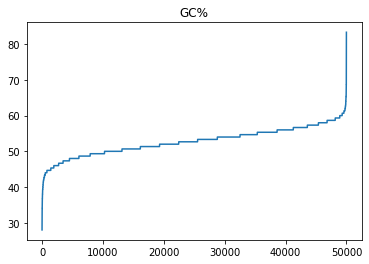

In [97]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import gzip
import pandas as pd
import matplotlib.pyplot as plt

fastq = '../../test_16S_FAST_v4/rawdata/FL-P_BKDL190814481-1a-AK3457-A26_1.fq.gz'
gc_values=[]
with gzip.open(fastq, "rt") as handle:
    for i,rec in enumerate(SeqIO.parse(handle, "fastq")):
        if i >= 50000 : break
        gc_values.append(GC(rec.seq))
plt.plot(sorted(gc_values))
plt.title('Reads GC%')
plt.show()

In [135]:
import numpy as np
seq = []
with gzip.open(fastq, "rt") as handle:
    for i,rec in enumerate(SeqIO.parse(handle, "fastq")):
        if i >= 50000 : break
        seq.append(list(str(rec.seq)))

np_seq = np.array(seq)
gc_pos = [GC(''.join(np_seq[:,i])) for i in range(len(seq[0]))]
plt.plot(gc_pos)
plt.title('Position GC%')
plt.show()

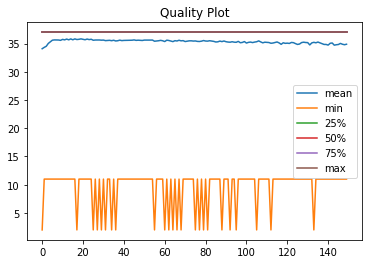

In [100]:
quality = []
with gzip.open(fastq, "rt") as handle:
    for i,record in enumerate(SeqIO.parse(handle, "fastq")):
        if i >= 50000 : break
        quality.append(record.letter_annotations["phred_quality"])
df = pd.DataFrame(quality).describe().drop(['count','std']).T
plt.plot(df)
plt.title('Quality Plot')
plt.legend(df.columns,loc='best')
plt.show()